> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [34]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline 

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

con = sqlite3.connect("soccer.sqlite")

df_country = pd.read_sql_query("SELECT *from Country", con) # We read the 'Country' table of the database
df_league = pd.read_sql_query("SELECT *from League", con) # We read the 'League' table of the database
df_match = pd.read_sql_query("SELECT *from Match", con) # We read the 'Match' table of the database
df_player = pd.read_sql_query("SELECT *from Player", con) # We read the 'Player' table of the database
df_player_attr = pd.read_sql_query("SELECT *from Player_Attributes", con) # We read the 'Player_Attributes' table of the database
df_team = pd.read_sql_query("SELECT *from Team", con) # We read the 'Team' table of the database
df_team_attr = pd.read_sql_query("SELECT *from Team_Attributes", con) # We read the 'Team_Attributes' table of the database
df_sequence = pd.read_sql_query("SELECT *from sqlite_sequence", con) # We read the 'sqlite_sequence' table of the database

We are going to extract the data from SQL database and create the required dataframes

In [35]:
df_country.head(2)

,id,name
0,1,Belgium
1,1729,England


In [36]:
df_league.head(2)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League


In [37]:
df_cleague=pd.merge(df_league, df_country,how='inner',on=['id']) # We are going to put togther the league names to their corresponding countries.
df_cleague

,id,country_id,name_x,name_y
0,1,1,Belgium Jupiler League,Belgium
1,1729,1729,England Premier League,England
2,4769,4769,France Ligue 1,France
3,7809,7809,Germany 1. Bundesliga,Germany
4,10257,10257,Italy Serie A,Italy
5,13274,13274,Netherlands Eredivisie,Netherlands
6,15722,15722,Poland Ekstraklasa,Poland
7,17642,17642,Portugal Liga ZON Sagres,Portugal
8,19694,19694,Scotland Premier League,Scotland
9,21518,21518,Spain LIGA BBVA,Spain


We are going to merge the country and league dataframes by joining the 'id' column innerly. This way we will know the league name in each country

In [38]:
df_cleague.rename(columns={'name_x':'league_name','name_y':'country'},inplace=True)
df_cleague.head(2)

,id,country_id,league_name,country
0,1,1,Belgium Jupiler League,Belgium
1,1729,1729,England Premier League,England


We have changed the column names to directly specify which column belongs to the country and which to the league name.

In [39]:
df_match.rename(columns={'match_api_id':'match'},inplace=True)
df_match.head(2)

,id,country_id,league_id,season,stage,date,match,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.2
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.6


The column 'match_api_id' name was changed for 'match' name

In [40]:
df_odd=df_match.iloc[:,np.r_[6,85:115]] 
df_odd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   match   25979 non-null  int64  
 1   B365H   22592 non-null  float64
 2   B365D   22592 non-null  float64
 3   B365A   22592 non-null  float64
 4   BWH     22575 non-null  float64
 5   BWD     22575 non-null  float64
 6   BWA     22575 non-null  float64
 7   IWH     22520 non-null  float64
 8   IWD     22520 non-null  float64
 9   IWA     22520 non-null  float64
 10  LBH     22556 non-null  float64
 11  LBD     22556 non-null  float64
 12  LBA     22556 non-null  float64
 13  PSH     11168 non-null  float64
 14  PSD     11168 non-null  float64
 15  PSA     11168 non-null  float64
 16  WHH     22571 non-null  float64
 17  WHD     22571 non-null  float64
 18  WHA     22571 non-null  float64
 19  SJH     17097 non-null  float64
 20  SJD     17097 non-null  float64
 21  SJA     17097 non-null  float64
 22

We have created dataframe containing just the betting odds and the match, so we can identify the correspondind odd for each match.

In [41]:
df_odd=df_odd.dropna(thresh=3) 
df_odd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22597 entries, 0 to 24556
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   match   22597 non-null  int64  
 1   B365H   22592 non-null  float64
 2   B365D   22592 non-null  float64
 3   B365A   22592 non-null  float64
 4   BWH     22575 non-null  float64
 5   BWD     22575 non-null  float64
 6   BWA     22575 non-null  float64
 7   IWH     22520 non-null  float64
 8   IWD     22520 non-null  float64
 9   IWA     22520 non-null  float64
 10  LBH     22556 non-null  float64
 11  LBD     22556 non-null  float64
 12  LBA     22556 non-null  float64
 13  PSH     11168 non-null  float64
 14  PSD     11168 non-null  float64
 15  PSA     11168 non-null  float64
 16  WHH     22571 non-null  float64
 17  WHD     22571 non-null  float64
 18  WHA     22571 non-null  float64
 19  SJH     17097 non-null  float64
 20  SJD     17097 non-null  float64
 21  SJA     17097 non-null  float64
 22

We delete the rows, where the amount of values different to NaN is less than 3.

In [42]:
df_odd.head()

,match,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,492473,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,492474,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,492475,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,492476,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,492477,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [43]:
subset_h = df_odd.loc[:,['BWH','B365H','IWH','LBH','PSH','WHH','SJH','VCH','GBH','BSH']]# subset for the home odds
subset_d = df_odd.loc[:,['BWD','B365D','IWD','LBD','PSD','WHD','SJD','VCD','GBD','BSD']]# subset for even odds
subset_a = df_odd.loc[:,['BWA','B365A','IWA','LBA','PSA','WHA','SJA','VCA','GBA','BSA']]# subset for away odds

#subset_h = df_wodd.iloc[:,np.r_[1,4,7,10,13,16,19,22,25,28]]
#subset_d = df_wodd.iloc[:,np.r_[2,5,8,11,14,17,20,23,26,29]]
#subset_a = df_wodd.iloc[:,np.r_[3,6,9,12,15,18,21,24,27,30]]

df_odd['mean_oddh'] = subset_h.mean(axis=1)# we create the mean value of all the odds, home, even and away winner.
df_odd['mean_oddd'] = subset_d.mean(axis=1)
df_odd['mean_odda'] = subset_a.mean(axis=1)


df_odd.head()

,match,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,...,VCA,GBH,GBD,GBA,BSH,BSD,BSA,mean_oddh,mean_oddd,mean_odda
0,492473,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,...,4.50,1.78,3.25,4.00,1.73,3.40,4.20,1.765556,3.322222,4.164444
1,492474,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,...,3.25,1.85,3.25,3.75,1.91,3.25,3.60,1.898889,3.250000,3.616667
2,492475,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,...,2.65,2.50,3.20,2.50,2.30,3.20,2.75,2.462222,3.233333,2.544444
3,492476,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,...,6.50,1.50,3.75,5.50,1.44,3.75,6.50,1.438889,3.805556,6.533333
4,492477,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,...,1.65,4.50,3.50,1.65,4.75,3.30,1.67,4.494444,3.422222,1.674444


We have created three different substets with the odds corresponding to home, even and away. After this, we have calculated
the mean of each of these and we have created the corresponding column in the *df_odd* dataframe.

Now we have a dataframe which includes the betting odds and the overall mean for home, even and away

In [44]:
df_mean_odds = df_odd.iloc[:,np.r_[0,31,32,33]]

The **df_mean_odds** dataframe just includes the match id and the mean odds. From now on, we will work with these mean values.

In [45]:
df_mean_odds.head(2)

,match,mean_oddh,mean_oddd,mean_odda
0,492473,1.765556,3.322222,4.164444
1,492474,1.898889,3.250000,3.616667


In [46]:
df_mean_odds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22597 entries, 0 to 24556
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   match      22597 non-null  int64  
 1   mean_oddh  22597 non-null  float64
 2   mean_oddd  22597 non-null  float64
 3   mean_odda  22597 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 882.7 KB


In [47]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [48]:
df_league_match=pd.merge(df_match, df_cleague,how='inner',on=['country_id']) 
df_league_match.head(2)

,id_x,country_id,league_id,season,stage,date,match,home_team_api_id,away_team_api_id,home_team_goal,...,VCA,GBH,GBD,GBA,BSH,BSD,BSA,id_y,league_name,country
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.50,1.78,3.25,4.00,1.73,3.40,4.2,1,Belgium Jupiler League,Belgium
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.25,1.85,3.25,3.75,1.91,3.25,3.6,1,Belgium Jupiler League,Belgium


We merge the *df_match* dataframe with the *df_cleague* innerly in order to be able to calculate the goal difference in every match.

In [49]:
df_league_match['goal_diff'] = df_league_match.apply(lambda row: row.home_team_goal - row.away_team_goal, axis=1) 
df_league_match.head(1)

,id_x,country_id,league_id,season,stage,date,match,home_team_api_id,away_team_api_id,home_team_goal,...,GBH,GBD,GBA,BSH,BSD,BSA,id_y,league_name,country,goal_diff
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,1.78,3.25,4.0,1.73,3.4,4.2,1,Belgium Jupiler League,Belgium,0


Now we create a column called *goal_diff*. This way, we can determine if the team who played at home won 
(if the result is greater than zero), if the match was even (if result equal zero) or if the away team won, when the result is
a negative integer.

In [50]:
def resultado(row):
    if row['goal_diff']==0:
        return 'Even'
    elif row['goal_diff']>=1:
        return 'Victory'
    else:
        return 'Defeat'
    
df_league_match['result']=df_league_match.apply(lambda row: resultado(row),axis=1)
df_league_match.head(2)

,id_x,country_id,league_id,season,stage,date,match,home_team_api_id,away_team_api_id,home_team_goal,...,GBD,GBA,BSH,BSD,BSA,id_y,league_name,country,goal_diff,result
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,3.25,4.00,1.73,3.40,4.2,1,Belgium Jupiler League,Belgium,0,Even
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.25,3.75,1.91,3.25,3.6,1,Belgium Jupiler League,Belgium,0,Even


Now we create a new column, called *result* to put into words what immediately before was explained,
so we now if the result was a *Victory*, *Even* or a *Defeat*, always talking of the point of view of the home team.

In [51]:
df_league_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25979 entries, 0 to 25978
Columns: 120 entries, id_x to result
dtypes: float64(96), int64(11), object(13)
memory usage: 24.0+ MB


In [52]:
df_league_match=df_league_match.iloc[:,np.r_[2,3,6,116,117,118,119]]

The next step will be to choose the columns that will be usefult later, in order to merge the new dataframe with the 
*df_mean_odds* one.

In [53]:
df_league_match.head(1)

,league_id,season,match,league_name,country,goal_diff,result
0,1,2008/2009,492473,Belgium Jupiler League,Belgium,0,Even


In [54]:
df_league_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25979 entries, 0 to 25978
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   league_id    25979 non-null  int64 
 1   season       25979 non-null  object
 2   match        25979 non-null  int64 
 3   league_name  25979 non-null  object
 4   country      25979 non-null  object
 5   goal_diff    25979 non-null  int64 
 6   result       25979 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.6+ MB


In [55]:
sum(df_league_match.T.duplicated().T) 

0

To check if duplicated columns

In [56]:
sum(df_league_match.duplicated()) 

0

To check if duplicated rows

In [57]:
df_stats = pd.merge(df_league_match, df_mean_odds,how='inner',on=['match'])
df_stats

,league_id,season,match,league_name,country,goal_diff,result,mean_oddh,mean_oddd,mean_odda
0,1,2008/2009,492473,Belgium Jupiler League,Belgium,0,Even,1.765556,3.322222,4.164444
1,1,2008/2009,492474,Belgium Jupiler League,Belgium,0,Even,1.898889,3.250000,3.616667
2,1,2008/2009,492475,Belgium Jupiler League,Belgium,-3,Defeat,2.462222,3.233333,2.544444
3,1,2008/2009,492476,Belgium Jupiler League,Belgium,5,Victory,1.438889,3.805556,6.533333
4,1,2008/2009,492477,Belgium Jupiler League,Belgium,-2,Defeat,4.494444,3.422222,1.674444
...,...,...,...,...,...,...,...,...,...,...
22592,21518,2015/2016,2030167,Spain LIGA BBVA,Spain,1,Victory,1.590000,3.800000,6.494286
22593,21518,2015/2016,2030168,Spain LIGA BBVA,Spain,2,Victory,2.298571,3.230000,3.258571
22594,21518,2015/2016,2030169,Spain LIGA BBVA,Spain,3,Victory,1.550000,3.958571,6.621429
22595,21518,2015/2016,2030170,Spain LIGA BBVA,Spain,0,Even,2.341429,3.271429,3.121429


We make a *merge* with the above mentioned two dataframes. With this information we will determine wether the favourite
team won the match or not.

In [58]:
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22597 entries, 0 to 22596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   league_id    22597 non-null  int64  
 1   season       22597 non-null  object 
 2   match        22597 non-null  int64  
 3   league_name  22597 non-null  object 
 4   country      22597 non-null  object 
 5   goal_diff    22597 non-null  int64  
 6   result       22597 non-null  object 
 7   mean_oddh    22597 non-null  float64
 8   mean_oddd    22597 non-null  float64
 9   mean_odda    22597 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 1.9+ MB


In [59]:
def favorito(row):
    if row['result']=='Victory' and row['mean_oddh']<row['mean_odda']:
        return 'Favourite_won'
    elif row['result']=='Defeat' and row['mean_oddh']<row['mean_odda']:
        return 'Non_favourite_won'
    elif row['result']=='Defeat' and row['mean_oddh']>row['mean_odda']:
        return 'Favourite_won'
    elif row['result']=='Victory' and row['mean_oddh']>row['mean_odda']:
        return 'Non_favourite_won'
    
    else:
        return 'No_winner'
    
df_stats['favourite']=df_stats.apply(lambda row: favorito(row),axis=1)
df_stats.head()

,league_id,season,match,league_name,country,goal_diff,result,mean_oddh,mean_oddd,mean_odda,favourite
0,1,2008/2009,492473,Belgium Jupiler League,Belgium,0,Even,1.765556,3.322222,4.164444,No_winner
1,1,2008/2009,492474,Belgium Jupiler League,Belgium,0,Even,1.898889,3.250000,3.616667,No_winner
2,1,2008/2009,492475,Belgium Jupiler League,Belgium,-3,Defeat,2.462222,3.233333,2.544444,Non_favourite_won
3,1,2008/2009,492476,Belgium Jupiler League,Belgium,5,Victory,1.438889,3.805556,6.533333,Favourite_won
4,1,2008/2009,492477,Belgium Jupiler League,Belgium,-2,Defeat,4.494444,3.422222,1.674444,Favourite_won


Taking into account the odd values and the results, we will create a new column called *favourite* to state if the favourite 
(team for which the odd is the smallest) team won or not.

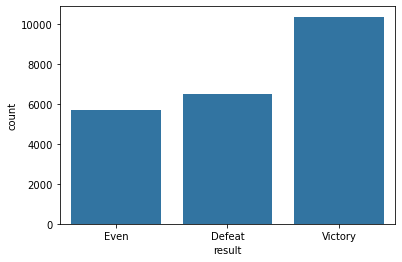

In [68]:
res = df_stats.result.value_counts()
res1 = res.index
p_count = res.values
base_color = sb.color_palette()[0]
sb.countplot(data=df_stats, x='result', color=base_color);

In this bar chart we can see the proportion of the victories, defeats and even matches from all over the world from 
2008 to 2016

In [69]:
tot_vict = df_stats[df_stats['result']=='Victory'].shape[0]/df_stats.shape[0]
tot_vict

0.45908748948975525

Almost the 46% of victories were fot the team that played as local.

In [70]:
tot_even = df_stats[df_stats['result']=='Even'].shape[0]/df_stats.shape[0]
tot_even

0.25304243926184894

The 25% of the matches were even.

In [71]:
tot_def = df_stats[df_stats['result']=='Defeat'].shape[0]/df_stats.shape[0]
tot_def

0.2878700712483958

Only the 28,7% of the matches were won by the team that played away

In [89]:
rslt_cntry=df_stats.groupby(['country','season']).result.value_counts('percentage')*100
rslt_cntry

country  season     result 
Belgium  2008/2009  Victory    48.844884
                    Defeat     29.372937
                    Even       21.782178
         2009/2010  Victory    46.190476
                    Defeat     29.523810
                                 ...    
Spain    2014/2015  Defeat     31.052632
                    Even       23.947368
         2015/2016  Victory    48.157895
                    Defeat     27.631579
                    Even       24.210526
Name: result, Length: 213, dtype: float64

In [90]:
df_rslt_cntry = pd.DataFrame([(rslt_cntry)])
df_rslt_cntry = df_rslt_cntry.reset_index()
df_rslt_cntry

country   index    Belgium                                             \
season           2008/2009                        2009/2010             
result             Victory     Defeat       Even    Victory    Defeat   
0        result  48.844884  29.372937  21.782178  46.190476  29.52381   

country                                              ...      Spain  \
season              2010/2011                        ...  2012/2013   
result        Even    Victory     Defeat       Even  ...       Even   
0        24.285714  48.333333  25.833333  25.833333  ...  22.105263   

country                                                                   \
season   2013/2014                       2014/2015                         
result     Victory     Defeat       Even   Victory     Defeat       Even   
0        47.105263  30.263158  22.631579      45.0  31.052632  23.947368   

country                                   
season   2015/2016                        
result     Victory     Defeat       Even  
0        48.157895  27.631579  24.210526  

[1 rows x 214 columns]

This the percentage for the victories for the team that had the lowest odd.

In [238]:
non_fav_vict = df_stats[df_stats['favourite']=='Non_favourite_won'].shape[0]/df_stats.shape[0]
non_fav_vict

0.21485152896402177

This the percentage for the victories for the team that had the highest odd.

In [239]:
1-fav_vict-non_fav_vict

0.25313094658582996

Percentage of even matches

In [240]:
df_stats['mean_oddh'].mean(),df_stats['mean_oddd'].mean(),df_stats['mean_odda'].mean()

(2.585833179938205, 3.766131027629732, 4.52501602191541)

These are the total mean values for the whole world.

In [241]:
moh=df_stats.groupby(['country']).mean_oddh.mean()
moh

country
Belgium        2.362783
England        2.641570
France         2.387508
Germany        2.569368
Italy          2.485857
Netherlands    2.521923
Portugal       2.857625
Scotland       2.747533
Spain          2.737371
Name: mean_oddh, dtype: float64

In [242]:
df_moh = pd.DataFrame([moh]).transpose()
df_moh

,mean_oddh
country,
Belgium,2.362783
England,2.641570
France,2.387508
Germany,2.569368
Italy,2.485857
Netherlands,2.521923
Portugal,2.857625
Scotland,2.747533
Spain,2.737371


The home victory mean odds for each country.

In [243]:
mod=df_stats.groupby(['country']).mean_oddd.mean()
mod

country
Belgium        3.658112
England        3.829071
France         3.411197
Germany        3.857329
Italy          3.568104
Netherlands    4.017822
Portugal       3.710743
Scotland       3.718433
Spain          4.104879
Name: mean_oddd, dtype: float64

In [244]:
df_mod = pd.DataFrame([mod]).transpose()
df_mod

,mean_oddd
country,
Belgium,3.658112
England,3.829071
France,3.411197
Germany,3.857329
Italy,3.568104
Netherlands,4.017822
Portugal,3.710743
Scotland,3.718433
Spain,4.104879


The even mean odds for each country.

In [ ]:
df_stats.groupby(['country']).mean_odda.mean()

The away victory mean odds for each country.

In [ ]:
df_stats.groupby(['result', 'country']).goal_diff.mean()

Above is possible to see the average goal difference for every country, depending on the result.

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [ ]:
df_stats['season'].unique()

In [ ]:
df_stats['country'].unique()

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!